In [2]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

from scipy.stats import norm 
from scipy import stats
%matplotlib inline 

In [3]:
dataset = pd.read_csv('Wages.csv', index_col = 0)

dataset.head()

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
1,3,32,no,0,yes,no,yes,male,no,9,no,5.56068
2,4,43,no,0,yes,no,yes,male,no,9,no,5.72031
3,5,40,no,0,yes,no,yes,male,no,9,no,5.99645
4,6,39,no,0,yes,no,yes,male,no,9,no,5.99645
5,7,42,no,1,yes,no,yes,male,no,9,no,6.06146


In [4]:
dataset.tail()

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
4161,3,50,no,0,no,yes,no,female,no,12,no,5.95324
4162,4,49,no,0,no,yes,no,female,no,12,no,6.06379
4163,5,50,no,0,no,yes,no,female,no,12,no,6.21461
4164,6,50,no,0,no,yes,no,female,no,12,no,6.29157
4165,7,50,no,0,no,yes,no,female,no,12,no,6.37161


In [5]:
dataset.shape

(4165, 12)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4165 entries, 1 to 4165
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   exp      4165 non-null   int64  
 1   wks      4165 non-null   int64  
 2   bluecol  4165 non-null   object 
 3   ind      4165 non-null   int64  
 4   south    4165 non-null   object 
 5   smsa     4165 non-null   object 
 6   married  4165 non-null   object 
 7   sex      4165 non-null   object 
 8   union    4165 non-null   object 
 9   ed       4165 non-null   int64  
 10  black    4165 non-null   object 
 11  lwage    4165 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 423.0+ KB


In [7]:
dataset.describe()

,exp,wks,ind,ed,lwage
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,19.853782,46.811525,0.395438,12.845378,6.676346
std,10.966370,5.129098,0.489003,2.787995,0.461512
min,1.000000,5.000000,0.000000,4.000000,4.605170
25%,11.000000,46.000000,0.000000,12.000000,6.395260
50%,18.000000,48.000000,0.000000,12.000000,6.684610
75%,29.000000,50.000000,1.000000,16.000000,6.952730
max,51.000000,52.000000,1.000000,17.000000,8.537000


In [8]:
#set the dtype: 'object' => 'category' : make the execution more faster 
 
columns = []
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        columns.append(i)
        dataset[i] = dataset[i].astype('category')
        
dataset.info(), columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4165 entries, 1 to 4165
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   exp      4165 non-null   int64   
 1   wks      4165 non-null   int64   
 2   bluecol  4165 non-null   category
 3   ind      4165 non-null   int64   
 4   south    4165 non-null   category
 5   smsa     4165 non-null   category
 6   married  4165 non-null   category
 7   sex      4165 non-null   category
 8   union    4165 non-null   category
 9   ed       4165 non-null   int64   
 10  black    4165 non-null   category
 11  lwage    4165 non-null   float64 
dtypes: category(7), float64(1), int64(4)
memory usage: 224.4 KB


(None, ['bluecol', 'south', 'smsa', 'married', 'sex', 'union', 'black'])

In [9]:
list(dataset.dtypes.unique())

[dtype('int64'),
 CategoricalDtype(categories=['no', 'yes'], ordered=False),
 CategoricalDtype(categories=['female', 'male'], ordered=False),
 dtype('float64')]

In [10]:
dataset.describe(include=['int64','float', 'category'])

,exp,wks,bluecol,ind,south,smsa,married,sex,union,ed,black,lwage
count,4165.000000,4165.000000,4165,4165.000000,4165,4165,4165,4165,4165,4165.000000,4165,4165.000000
unique,NaN,NaN,2,NaN,2,2,2,2,2,NaN,2,NaN
top,NaN,NaN,yes,NaN,no,yes,yes,male,no,NaN,no,NaN
freq,NaN,NaN,2129,NaN,2956,2723,3392,3696,2649,NaN,3864,NaN
mean,19.853782,46.811525,NaN,0.395438,NaN,NaN,NaN,NaN,NaN,12.845378,NaN,6.676346
std,10.966370,5.129098,NaN,0.489003,NaN,NaN,NaN,NaN,NaN,2.787995,NaN,0.461512
min,1.000000,5.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,4.605170
25%,11.000000,46.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,6.395260
50%,18.000000,48.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,6.684610
75%,29.000000,50.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,6.952730


In [11]:
dataset.columns

Index(['exp', 'wks', 'bluecol', 'ind', 'south', 'smsa', 'married', 'sex',
       'union', 'ed', 'black', 'lwage'],
      dtype='object')

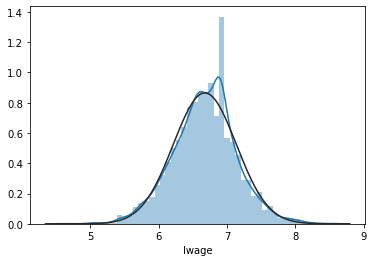

In [12]:
sns.distplot(dataset.lwage, fit= norm )
plt.show()

C:\Users\solih\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


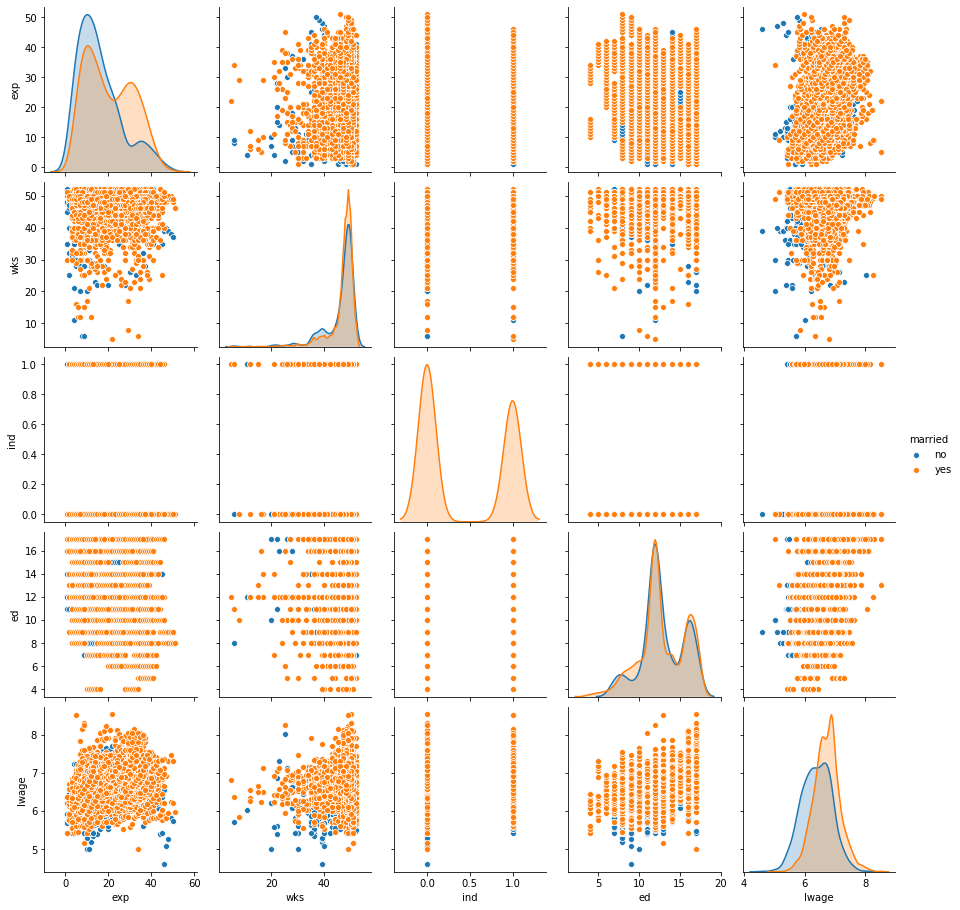

In [13]:
sns.pairplot(dataset, hue='married')
plt.show()

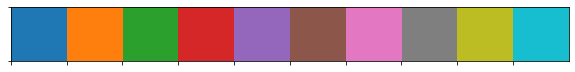

In [14]:
sns.palplot(sns.color_palette())

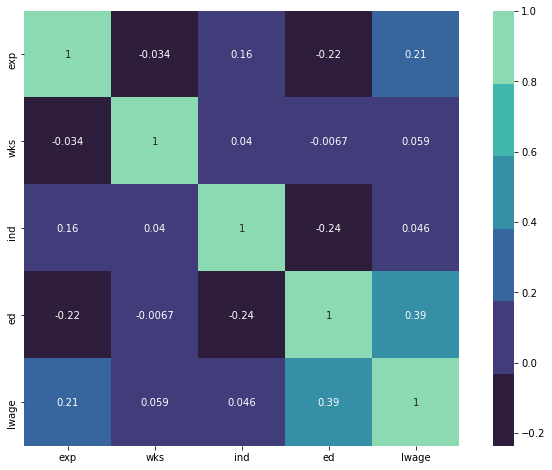

In [15]:
corr_matrix = dataset.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap=sns.color_palette("mako"), annot = True, square = True)
plt.show()
#sns.color_palette("viridis", as_cmap=True)

In [16]:
dataset.describe()

,exp,wks,ind,ed,lwage
count,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,19.853782,46.811525,0.395438,12.845378,6.676346
std,10.966370,5.129098,0.489003,2.787995,0.461512
min,1.000000,5.000000,0.000000,4.000000,4.605170
25%,11.000000,46.000000,0.000000,12.000000,6.395260
50%,18.000000,48.000000,0.000000,12.000000,6.684610
75%,29.000000,50.000000,1.000000,16.000000,6.952730
max,51.000000,52.000000,1.000000,17.000000,8.537000


In [17]:
data = dataset.lwage
type(data)

pandas.core.series.Series

In [18]:
data.shape

(4165,)

In [19]:
data[:10]

1     5.56068
2     5.72031
3     5.99645
4     5.99645
5     6.06146
6     6.17379
7     6.24417
8     6.16331
9     6.21461
10    6.26340
Name: lwage, dtype: float64

In [20]:
data = data.sort_values()
data.count()

4165

In [21]:
data[:10]

3279    4.60517
1163    5.01064
1164    5.01064
2551    5.01728
3280    5.08140
526     5.16479
1277    5.19296
3281    5.27300
4145    5.29832
1278    5.34711
Name: lwage, dtype: float64

In [22]:
# cause the 'lwage' approach to normal. I decide to chose outlier by using more than 3 sd
mean = np.mean(dataset.lwage)
std = np.std(dataset.lwage)

data = data[((data <= mean-(std*3)) | (data >= mean+(std*3)))]
data

3279    4.60517
1163    5.01064
1164    5.01064
2551    5.01728
3280    5.08140
526     5.16479
1277    5.19296
3281    5.27300
829     8.08641
2434    8.10168
832     8.12089
1887    8.13153
1175    8.16052
2467    8.16052
830     8.22951
3923    8.26873
1176    8.30820
2118    8.51719
833     8.53700
Name: lwage, dtype: float64

In [23]:
data.shape

(19,)

In [26]:
dataset.groupby('ed').sum().reset_index()

,ed,exp,wks,ind,lwage
0,4,308,644,9,84.53289
1,5,791,960,7,135.15849
2,6,868,1284,26,179.86266
3,7,1841,3627,56,482.60096
4,8,4872,7937,112,1121.36125
5,9,3584,7514,80,1042.12038
6,10,5614,10742,123,1501.49946
7,11,4795,9751,100,1369.13446
8,12,29190,70567,655,9892.07715
9,13,2800,8746,54,1199.88687


-0.4 	 0.8
0.6 	 0.8
1.6 	 0.8
2.6 	 0.8
3.6 	 0.8
4.6 	 0.8
5.6 	 0.8
6.6 	 0.8
7.6 	 0.8
8.6 	 0.8
9.6 	 0.8
10.6 	 0.8
11.6 	 0.8
12.6 	 0.8


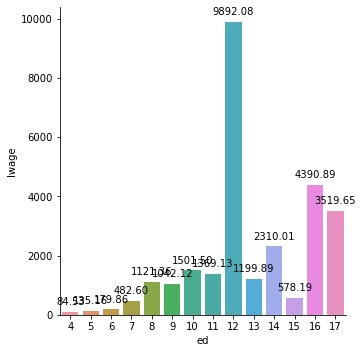

<Figure size 864x576 with 0 Axes>

In [76]:
data = dataset.groupby('ed').sum().reset_index()
g = sns.catplot(x='ed',y='lwage' ,kind='bar', data=data)
plt.figure(figsize=(12,8))
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x()+ p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# matplotlib.pyplot.annotate('text', xy coordianate, arguments, keyword arguments)

In [28]:
dataset.groupby('married').sum().reset_index()

,married,exp,wks,ind,ed,lwage
0,no,12495,35666,171,9967,4945.95476
1,yes,70196,159304,1476,43534,22861.02800


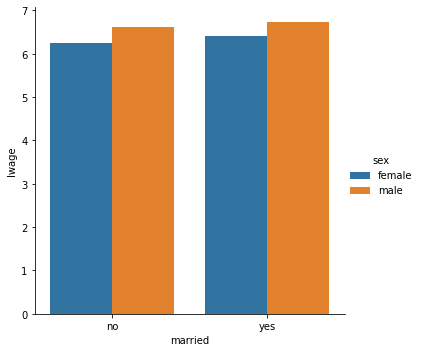

In [29]:
sns.catplot(x='married',y='lwage', hue='sex' ,kind='bar', data=dataset, ci=False)

In [58]:
dataset.married.value_counts()

yes    3392
no      773
Name: married, dtype: int64

In [70]:
dataset.pivot_table(values='lwage', columns= 'sex', index='married', aggfunc=sum)

sex,female,male
married,,
no,2856.93397,2089.02079
yes,76.80530,22784.22270


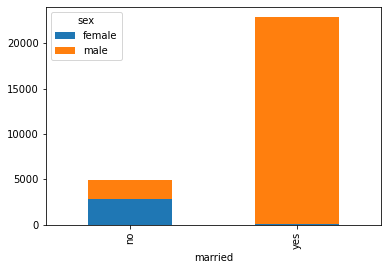

In [71]:
dataset.pivot_table(values='lwage', columns= 'sex', index='married', aggfunc=sum).plot.bar(stacked=True)
plt.show()

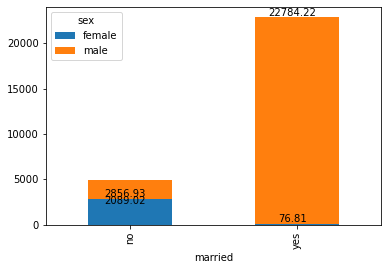

In [87]:

fig, ax = plt.subplots()
dataset.pivot_table(values='lwage', columns= 'sex', index='married', aggfunc=sum).plot.bar(stacked=True, ax = ax)

for x in ax.patches:
    ax.annotate(format(x.get_height(),'.2f'),
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(-5,5), ha='center', va='center',
               textcoords = 'offset points')

### numerical columns 

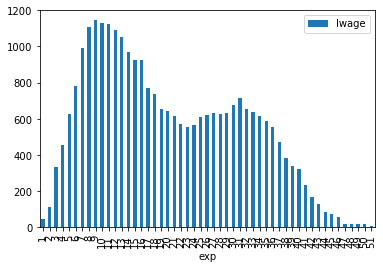

In [97]:
data = dataset.groupby('exp').sum().reset_index()  #must reset, cause plot cant read 'exp' value as index 
data.plot.bar(x='exp', y='lwage')

## want the xtick see-able for observation 

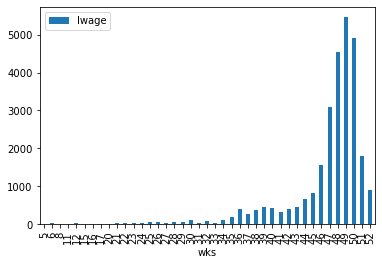

In [99]:
data = dataset.groupby('wks').sum().reset_index() 
data.plot.bar(x='wks', y='lwage')
plt.show()

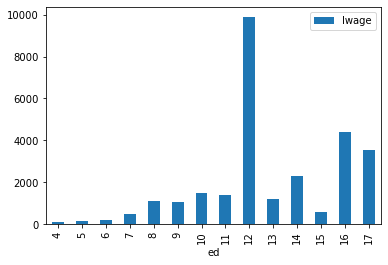

In [100]:
data = dataset.groupby('ed').sum().reset_index() 
data.plot.bar(x='ed', y='lwage')
plt.show()

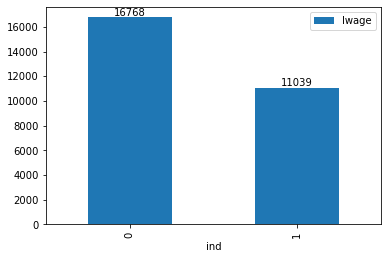

In [115]:
data = dataset.groupby('ind').sum().reset_index() 
fig, ax = plt.subplots()
data.plot.bar(x='ind', y='lwage',ax=ax)

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

### Category columns

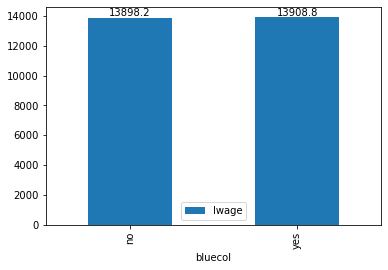

In [118]:
data = dataset.groupby('bluecol').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='bluecol', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

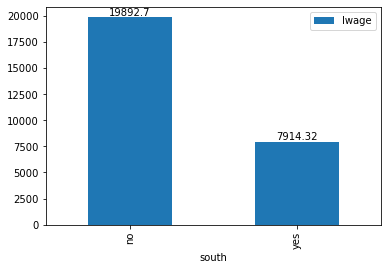

In [120]:
data = dataset.groupby('south').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='south', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

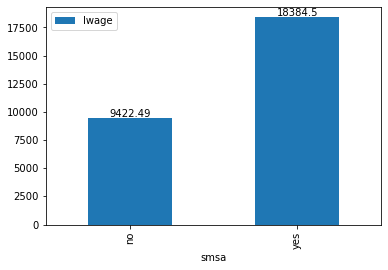

In [121]:
data = dataset.groupby('smsa').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='smsa', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

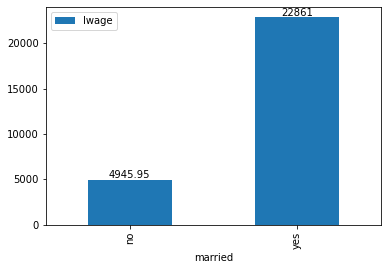

In [122]:
data = dataset.groupby('married').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='married', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

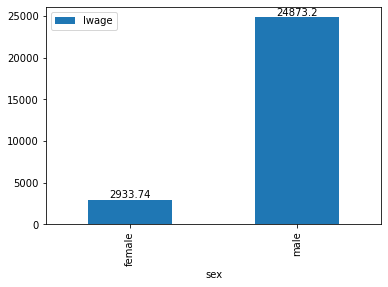

In [123]:
data = dataset.groupby('sex').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='sex', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

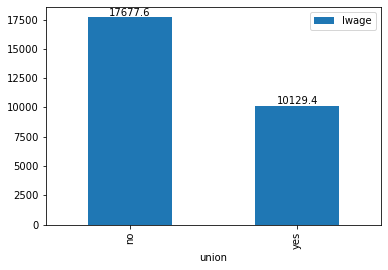

In [125]:
data = dataset.groupby('union').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='union', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

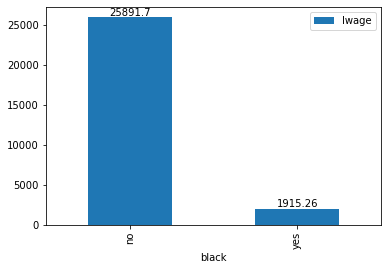

In [126]:
data = dataset.groupby('black').sum().reset_index()

fig, ax = plt.subplots()
data.plot.bar(x='black', y='lwage', ax=ax )

for x in ax.patches:
    ax.annotate(format(x.get_height(),'n'),    # 'n' => for interger value only. No decimal 
               (x.get_x()+x.get_width()/2.,x.get_height()),
                xytext=(0,5), ha='center', va='center',
               textcoords = 'offset points')

plt.show()

In [154]:
print(dataset.groupby('exp').sum()['lwage'].max())
print(dataset.groupby('wks').sum()['lwage'].max())
print(dataset.groupby('ed').sum()['lwage'].max())
print(dataset.groupby('ind').sum()['lwage'].max())
print(dataset.groupby('bluecol').sum()['lwage'].max())
print(dataset.groupby('south').sum()['lwage'].max())
print(dataset.groupby('smsa').sum()['lwage'].max())
print(dataset.groupby('married').sum()['lwage'].max())
print(dataset.groupby('sex').sum()['lwage'].max())
print(dataset.groupby('union').sum()['lwage'].max())
print(dataset.groupby('black').sum()['lwage'].max())

1146.6878399999996
5469.018580000004
9892.077149999981
16767.958480000016
13908.76835000002
19892.665530000068
18384.495910000005
22861.02800000004
24873.243490000066
17677.596899999993
25891.71905000008


In [157]:
print(dataset.groupby('exp').sum()['lwage'].idxmax(), '\t', dataset.groupby('exp').sum()['lwage'].max())
print(dataset.groupby('wks').sum()['lwage'].idxmax(), '\t', dataset.groupby('wks').sum()['lwage'].max())
print(dataset.groupby('ed').sum()['lwage'].idxmax(), '\t', dataset.groupby('ed').sum()['lwage'].max())
print(dataset.groupby('ind').sum()['lwage'].idxmax(), '\t', dataset.groupby('ind').sum()['lwage'].max())
print(dataset.groupby('bluecol').sum()['lwage'].idxmax(), '\t', dataset.groupby('bluecol').sum()['lwage'].max())
print(dataset.groupby('south').sum()['lwage'].idxmax(), '\t', dataset.groupby('south').sum()['lwage'].max())
print(dataset.groupby('smsa').sum()['lwage'].idxmax(), '\t', dataset.groupby('smsa').sum()['lwage'].max())
print(dataset.groupby('married').sum()['lwage'].idxmax(), '\t', dataset.groupby('married').sum()['lwage'].max())
print(dataset.groupby('sex').sum()['lwage'].idxmax(), '\t', dataset.groupby('sex').sum()['lwage'].max())
print(dataset.groupby('union').sum()['lwage'].idxmax(), '\t', dataset.groupby('union').sum()['lwage'].max())
print(dataset.groupby('black').sum()['lwage'].idxmax(), '\t', dataset.groupby('black').sum()['lwage'].max())


9 	 1146.6878399999996
49 	 5469.018580000004
12 	 9892.077149999981
0 	 16767.958480000016
yes 	 13908.76835000002
no 	 19892.665530000068
yes 	 18384.495910000005
yes 	 22861.02800000004
male 	 24873.243490000066
no 	 17677.596899999993
no 	 25891.71905000008


In [162]:
print(dataset.groupby('exp').sum()['lwage'].nlargest(1))
print(dataset.groupby('wks').sum()['lwage'].nlargest(1))
print(dataset.groupby('ed').sum()['lwage'].nlargest(1))
print(dataset.groupby('ind').sum()['lwage'].nlargest(1))
print(dataset.groupby('bluecol').sum()['lwage'].nlargest(1))
print(dataset.groupby('south').sum()['lwage'].nlargest(1))
print(dataset.groupby('smsa').sum()['lwage'].nlargest(1))
print(dataset.groupby('married').sum()['lwage'].nlargest(1))
print(dataset.groupby('sex').sum()['lwage'].nlargest(1))
print(dataset.groupby('union').sum()['lwage'].nlargest(1))
print(dataset.groupby('black').sum()['lwage'].nlargest(1))

exp
9    1146.68784
Name: lwage, dtype: float64
wks
49    5469.01858
Name: lwage, dtype: float64
ed
12    9892.07715
Name: lwage, dtype: float64
ind
0    16767.95848
Name: lwage, dtype: float64
bluecol
yes    13908.76835
Name: lwage, dtype: float64
south
no    19892.66553
Name: lwage, dtype: float64
smsa
yes    18384.49591
Name: lwage, dtype: float64
married
yes    22861.028
Name: lwage, dtype: float64
sex
male    24873.24349
Name: lwage, dtype: float64
union
no    17677.5969
Name: lwage, dtype: float64
black
no    25891.71905
Name: lwage, dtype: float64
